In [13]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix, f1_score

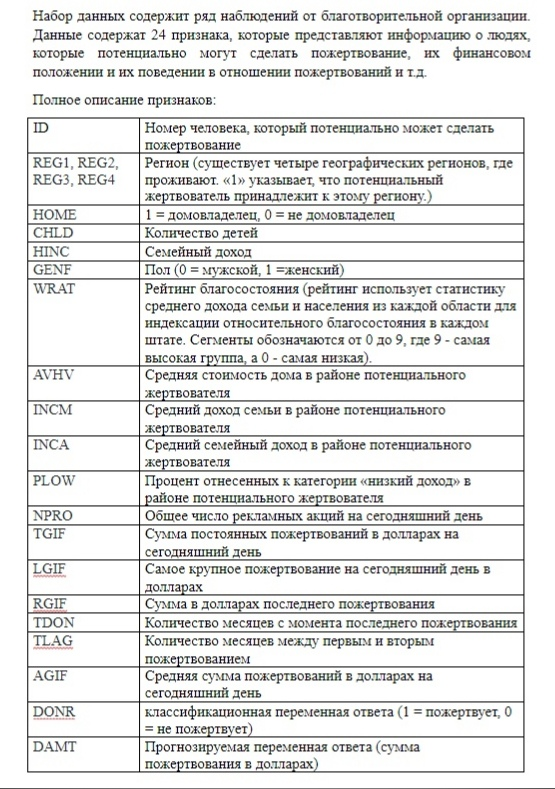

Ваша задача предсказать 'donr'

In [5]:
df_train = pd.read_csv('Real_Train_chr_data.csv')

In [6]:
X = df_train.drop('donr', axis=1)
y = df_train[['ID', 'donr']]

In [7]:
regr = linear_model.LogisticRegression(random_state=0)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
y_train['donr'].values

array([0., 0., 1., ..., 1., 1., 0.])

In [10]:
regr.fit(X_train, y_train['donr'])

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
y_pred = regr.predict(X_test)

In [13]:
y_test['donr'].values

array([0., 0., 0., ..., 1., 0., 1.])

## Подсчёт характеристик

In [12]:
confusion_matrix(y_test['donr'], y_pred)

array([[523, 116],
       [ 91, 531]], dtype=int64)

In [14]:
f1_score(y_test['donr'], y_pred)

0.8368794326241135

## Сохранение результатов на тесте

In [15]:
#обучение на всех данных
fin_mod = linear_model.LogisticRegression(random_state=0)
fin_mod.fit(X, y['donr'])

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
df_test = pd.read_csv('Real_Test_chr_data.csv')

In [19]:
df_test.head()

,Unnamed: 0,ID,reg1,reg2,reg3,reg4,home,chld,hinc,genf,...,incm,inca,plow,npro,tgif,lgif,rgif,tdon,tlag,agif
0,1782,3503,1,0,0,0,1,3,6,1,...,25,41,22,62,86,11,14,17,10,6.41
1,3917,7875,0,1,0,0,1,0,4,1,...,47,47,14,12,41,23,13,15,3,14.55
2,221,484,0,0,0,0,1,2,2,1,...,76,76,2,67,116,67,45,21,4,21.99
3,2135,4240,0,0,0,0,1,3,4,1,...,29,42,20,41,50,27,20,15,15,14.15
4,1841,7349,0,0,1,0,1,5,2,1,...,72,72,2,78,114,17,24,23,6,7.66


In [20]:
y_fin = fin_mod.predict(df_test)

In [21]:
y_fin_df = pd.DataFrame(y_fin, columns=['donr'])

In [22]:
y_fin_df

,donr
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
1796,1.0
1797,0.0
1798,1.0
1799,0.0


In [24]:
filename = 'yymmdd_Surn_1.csv'
y_fin_df.to_csv(filename, index=None)